In [224]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import solve_ivp

In [225]:
motor_max_torque = 1.1 #N*m, from salto after gearing
motor_max_vel = 25 #rad/s, 825kv motor geared 38.3
motor_I = 0.00000256 #kg*m^2
def get_motor_torque(t, motor_vel):
    input = 0*t + 1 # replace with better function of t
    return motor_max_torque * (input - motor_vel/motor_max_vel)

In [226]:
def get_TSA_mult(motor_pos):
    return 1 #replace with actual tsa function


In [227]:
def get_link_mult(foot_pos):
    if foot_pos < 0.05: return 0.1
    else: return 5
    return 2 #replace with actual MA profile

In [228]:
total_mass = 0.101 #kg

def jump_model(t, s, k): #k is spring constant in N/m
    motor_pos, dmotor_pos, foot_pos, dfoot_pos = s #state

    TSA_mult = get_TSA_mult(motor_pos)
    link_mult = get_link_mult(foot_pos)

    spring_pos = -motor_pos/TSA_mult + foot_pos/link_mult

    motor_torque = get_motor_torque(t, dmotor_pos)

    spring_force = -k * spring_pos

    motor_net_torque = motor_torque - spring_force/TSA_mult
    ddmotor_pos = motor_net_torque / motor_I

    foot_applied_force = spring_force*link_mult
    ddfoot_pos = foot_applied_force / total_mass

    return [dmotor_pos, ddmotor_pos, dfoot_pos, ddfoot_pos]

In [229]:
max_extension = 0.15 #m
def liftoff(t, s, k):
    motor_pos, dmotor_pos, foot_pos, dfoot_pos = s #state
    return foot_pos - max_extension
liftoff.terminal = True

In [230]:
def solve_end_vel(k, doPlot):
    t_span = (0, 5)
    s0 = (0, 0, 0, 0)
    solution = solve_ivp(jump_model, t_span, s0, events=[liftoff], max_step=0.01, args=(k,))

    motor_pos_data = solution.y[0, :]
    motor_vel_data = solution.y[1, :]
    foot_pos_data = solution.y[2, :]
    foot_vel_data = solution.y[3, :]



    if doPlot:
        plt.figure()
        plt.plot(solution.t, motor_pos_data, label='motor_pos')
        plt.plot(solution.t, motor_vel_data, label='motor_vel')
        plt.plot(solution.t, foot_pos_data, label='foot_pos')
        plt.plot(solution.t, foot_vel_data, label='foot_vel')
        plt.legend()
        plt.xlabel('time(s)')

    return foot_vel_data[-1]


3.6561335982281697

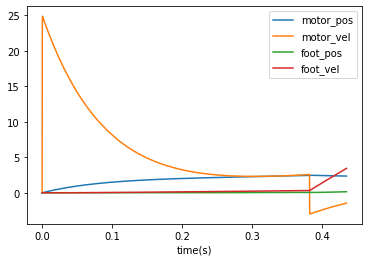

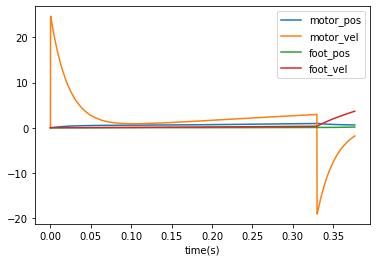

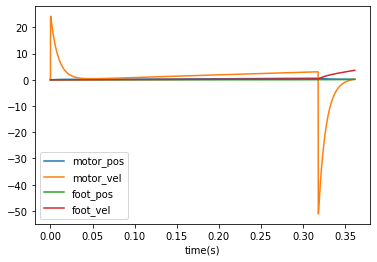

In [231]:
solve_end_vel(k=0.5, doPlot=True) 
solve_end_vel(k=2, doPlot=True) 
solve_end_vel(k=5, doPlot=True) 


[3.574304335728893, 3.6049224421235575, 3.6280580543278047, 3.6453602974001993, 3.6580666101343704, 3.6671541616784906, 3.6733963891782015, 3.6774026462297864, 3.679658407375583, 3.6805469796229593, 3.6803775508537218, 3.6793937024586434, 3.6777892004684105, 3.675724565354416, 3.6733237578596034, 3.6706834804577935, 3.6678820404742156, 3.6649859764108332, 3.66203479808062, 3.659075533977377, 3.6561335982284007, 3.6532296770487647, 3.6503866022822873, 3.647609386736969, 3.644912651438846, 3.6422992295484122, 3.639772436139341, 3.63733048167092, 3.6349826465290533, 3.632721320987106, 3.630547870404087, 3.6284655095319307, 3.6264518562257027, 3.624526682473389, 3.6226784025054495, 3.62090519951493, 3.6191994146984934, 3.6175669240074377, 3.615996439148048, 3.6144828802691444, 3.613033374243507, 3.61163836443748, 3.610296934608664, 3.6090333847059894, 3.607761279615784]


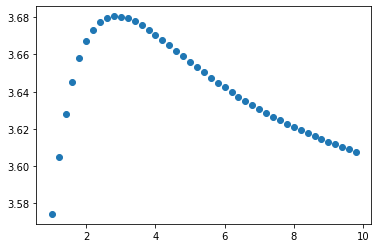

In [237]:
test_ks = np.arange(1, 10, 0.2)
end_vels = []

for i in test_ks:
    end_vel = solve_end_vel(k = i, doPlot=False)
    end_vels.append(end_vel)

print(end_vels)
plt.plot(test_ks, end_vels, 'o')
